In [20]:
import numpy as np
import matplotlib.pyplot as plt
import math

duration = 15 # Durasi pengukuran
dt = 0.1 # Interval sampling
num_steps = int(duration / dt)
k = np.arange(0, duration, dt)

pos_awal = 0 # x(0)
kec_awal = 0 # x_dot(0)g
percepatan = np.sin(k*math.pi/5) #x\ddot(k)
pos_aktual = pos_awal + kec_awal * k + 0.5 * percepatan * t**2
np.random.seed(25)

In [21]:
# Generate data pengukuran dengan noise putih
imu_noise = 1
imu_data = pos_aktual + np.random.normal(0, imu_noise, size=num_steps)
odo_noise = 1
odo_data = pos_aktual + np.random.normal(0, odo_noise, size=num_steps)
gps_noise = 1
gps_data = pos_aktual + np.random.normal(0, gps_noise, size=num_steps)

pos_estimasi = (imu_data + odo_data + gps_data)/3

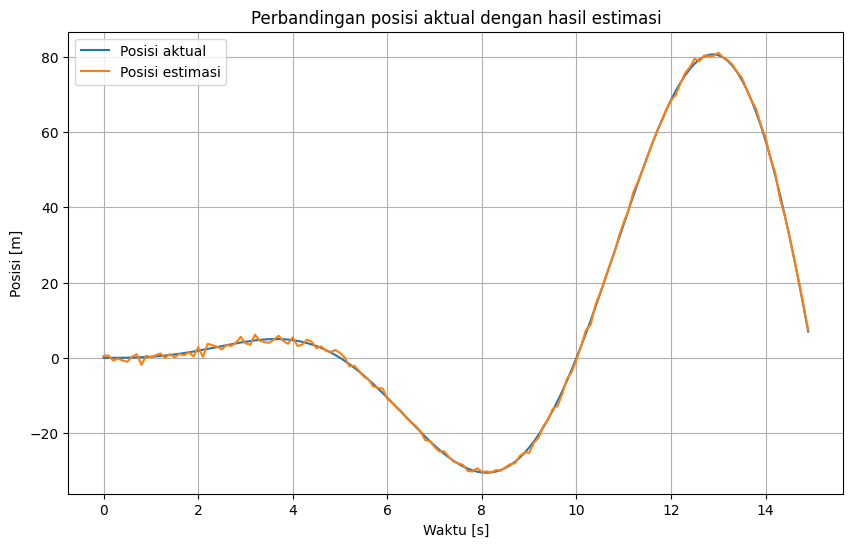

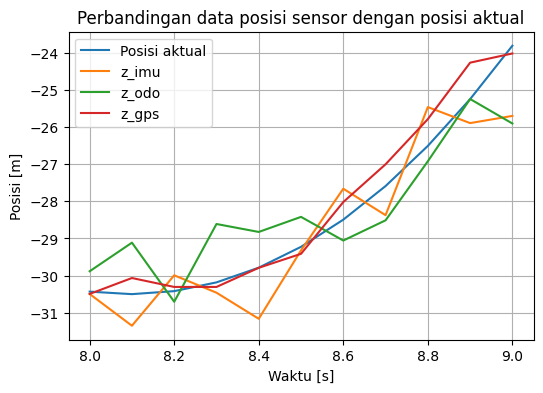

In [27]:
# Plot posisi asli, hasil estimasi, serta hasil pengukuran
plt.figure(figsize=(10, 6))
plt.plot(k, pos_aktual, label='Posisi aktual')
plt.plot(k, pos_estimasi, label='Posisi estimasi')
# plt.plot(t, accmeter_data, label='Position (Accelerometer)')
# plt.plot(t, odometer_data, label='Odometer')
# plt.plot(t, gps_data, label='GPS')

plt.xlabel('Waktu [s]')
plt.ylabel('Posisi [m]')
plt.title('Perbandingan posisi aktual dengan hasil estimasi')
plt.legend()
plt.savefig("Posisi asli vs estimasi", dpi = 300)
plt.grid(True)

plt.figure(figsize=(6, 4))
low = 80
hi = low + 11
plt.plot(k[low:hi], pos_aktual[low:hi], label='Posisi aktual')
# plt.plot(t[low:hi], pos_estimasi[low:hi], label='Estimated Position')
plt.plot(k[low:hi], imu_data[low:hi], label='z_imu')
plt.plot(k[low:hi], odo_data[low:hi], label='z_odo')
plt.plot(k[low:hi], gps_data[low:hi], label='z_gps')

plt.xlabel('Waktu [s]')
plt.ylabel('Posisi [m]')
plt.title('Perbandingan data posisi sensor dengan posisi aktual')
plt.legend()
plt.savefig("Posisi dari pengukuran", dpi = 300)
plt.grid(True)

plt.show()

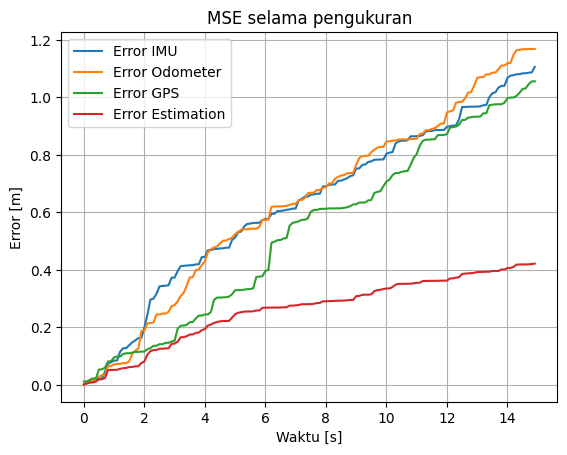

In [26]:
imu_err = np.cumsum((pos_aktual - imu_data)**2)/num_steps
odo_err = np.cumsum((pos_aktual - odo_data)**2)/num_steps
gps_err = np.cumsum((pos_aktual - gps_data)**2)/num_steps
est_err = np.cumsum((pos_aktual - pos_estimasi)**2)/num_steps

plt.plot(k, imu_err, label='Error IMU')
plt.plot(k, odo_err, label='Error Odometer')
plt.plot(k, gps_err, label='Error GPS')
plt.plot(k, est_err, label='Error Estimation')

plt.xlabel('Waktu [s]')
plt.ylabel('Error [m]')
plt.title('MSE selama pengukuran')
plt.legend()
plt.savefig("Error terhadap waktu", dpi = 300)
plt.grid(True)
plt.show()

In [265]:
# Mean Squared Error dari masing-masing pengukuran
MSE_imu = np.square(np.subtract(pos_aktual, imu_data)).mean()
MSE_odo = np.square(np.subtract(pos_aktual, odo_data)).mean()
MSE_gps = np.square(np.subtract(pos_aktual, gps_data)).mean()
MSE_est = np.square(np.subtract(pos_aktual, pos_estimasi)).mean()

print(f"MSE IMU: {MSE_imu:.3f}")
print(f"MSE Odometer: {MSE_odo:.3f}")
print(f"MSE GPS: {MSE_gps:.3f}")
print(f"MSE Estimasi: {MSE_est:.3f}")

MSE IMU: 1.106
MSE Odometer: 1.169
MSE GPS: 1.056
MSE Estimasi: 0.422


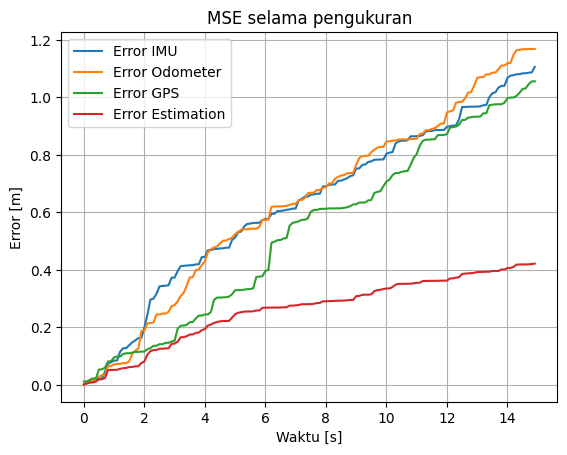

In [32]:
imu_err = np.cumsum((pos_aktual - imu_data)**2)/num_steps
odo_err = np.cumsum((pos_aktual - odo_data)**2)/num_steps
gps_err = np.cumsum((pos_aktual - gps_data)**2)/num_steps
est_err = np.cumsum((pos_aktual - pos_estimasi)**2)/num_steps

koplak = [[imu_err,'Error IMU'],[odo_err,'Error Odometer'],[gps_err,'Error GPS'],[est_err, 'Error Estimation']]
for elol,labeull in koplak:
    plt.plot(k, elol,label=labeull)

# plt.plot(k, imu_err, label='Error IMU')
# plt.plot(k, odo_err, label='Error Odometer')
# plt.plot(k, gps_err, label='Error GPS')
# plt.plot(k, est_err, label='Error Estimation')

plt.xlabel('Waktu [s]')
plt.ylabel('Error [m]')
plt.title('MSE selama pengukuran')
plt.legend()
plt.grid(True)
plt.show()